In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('attrition.csv')

In [4]:
df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,53,124,2,38,7525,23537,2,12,30,2,15,7,6,12,0
1,21,337,7,31,2679,4567,1,13,1,3,1,0,1,0,1
2,36,1218,9,82,3407,6986,7,23,10,4,5,3,0,3,1
3,38,1391,10,66,2684,12127,0,17,3,0,2,1,0,2,0
4,24,1476,4,42,4162,15211,1,12,5,3,5,4,0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2233 non-null   int64
 1   DailyRate                2233 non-null   int64
 2   DistanceFromHome         2233 non-null   int64
 3   HourlyRate               2233 non-null   int64
 4   MonthlyIncome            2233 non-null   int64
 5   MonthlyRate              2233 non-null   int64
 6   NumCompaniesWorked       2233 non-null   int64
 7   PercentSalaryHike        2233 non-null   int64
 8   TotalWorkingYears        2233 non-null   int64
 9   TrainingTimesLastYear    2233 non-null   int64
 10  YearsAtCompany           2233 non-null   int64
 11  YearsInCurrentRole       2233 non-null   int64
 12  YearsSinceLastPromotion  2233 non-null   int64
 13  YearsWithCurrManager     2233 non-null   int64
 14  Attrition                2233 non-null   int64
dtypes: i

In [6]:
df.dtypes

Age                        int64
DailyRate                  int64
DistanceFromHome           int64
HourlyRate                 int64
MonthlyIncome              int64
MonthlyRate                int64
NumCompaniesWorked         int64
PercentSalaryHike          int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
Attrition                  int64
dtype: object

In [7]:
plt.rcParams['figure.figsize'] = [15,8]

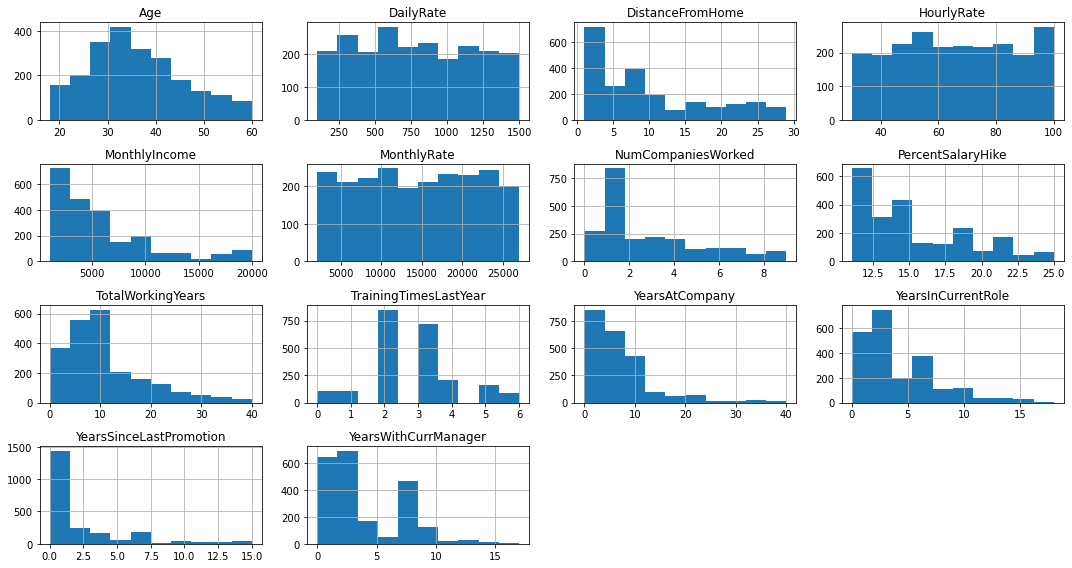

In [9]:
df.drop(['Attrition'],axis=1).hist()
plt.tight_layout()
plt.show()

In [12]:
total =df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)                               

In [13]:
data= pd.concat([total,percent],axis=1,keys=['Total','Percentage of Missing Values'])
data

,Total,Percentage of Missing Values
Age,0,0.0
DailyRate,0,0.0
DistanceFromHome,0,0.0
HourlyRate,0,0.0
MonthlyIncome,0,0.0
MonthlyRate,0,0.0
NumCompaniesWorked,0,0.0
PercentSalaryHike,0,0.0
TotalWorkingYears,0,0.0
TrainingTimesLastYear,0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

In [18]:
df_std= StandardScaler().fit_transform(df.drop('Attrition',axis=1))

In [19]:
df_std.shape


(2233, 14)

In [21]:
df_std

array([[ 1.76300382, -1.64530779, -0.93974222, ...,  0.88002971,
         1.1918144 ,  2.36108437],
       [-1.53664261, -1.11004187, -0.33409561, ..., -1.06865203,
        -0.3520547 , -1.06842651],
       [ 0.01006666,  1.10389839, -0.09183696, ..., -0.23350271,
        -0.66082852, -0.21104879],
       ...,
       [ 2.38168753,  0.77972325, -1.06087154, ...,  0.04488039,
        -0.66082852,  0.07474378],
       [ 1.96923173,  0.78474923, -0.93974222, ..., -0.51188582,
        -0.3520547 , -0.49684137],
       [-0.0930473 , -1.5900221 , -0.93974222, ...,  0.04488039,
        -0.3520547 ,  0.07474378]])

In [22]:
# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

In [24]:
#generate the covariance matrix using 'cov' function
# consider the transpose of the dataframe 'df_attr_std' to obtain the covarinace between the independent variables (columns)  
cov_mat = np.cov(df_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00044803  0.00108543 -0.01932118  0.0878637   0.52070041  0.01222788
   0.33604246  0.00204405  0.70266994 -0.016474    0.40437271  0.31282288
   0.28426132  0.28952944]
 [ 0.00108543  1.00044803 -0.04458367  0.03175072  0.0046552  -0.06645707
   0.04615258 -0.0251113   0.00376656 -0.01589741 -0.04716883 -0.00204887
  -0.04038946 -0.0087683 ]
 [-0.01932118 -0.04458367  1.00044803  0.01457042 -0.02010008  0.03498196
  -0.07096223  0.05712164 -0.0178718  -0.03928711 -0.0083611  -0.01374887
  -0.00233438 -0.00999183]
 [ 0.0878637   0.03175072  0.01457042  1.00044803  0.00239115 -0.01897197
   0.02315547 -0.01598421  0.03058398 -0.00866239  0.01403102 -0.02585746
  -0.03357082 -0.00111668]
 [ 0.52070041  0.0046552  -0.02010008  0.00239115  1.00044803  0.05210244
   0.16559791 -0.03711425  0.76515409 -0.02448325  0.56170029  0.44724512
   0.37540876  0.39924222]]


In [25]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.30567107 1.51892139 0.12679687 0.21619259 0.25285258 0.43403018
 0.47151197 0.68139318 1.1302603  1.04197238 1.01182564 0.99398062
 0.90451699 0.91634664] 

Eigenvectors: 
 
 [[ 3.04538423e-01  4.33467401e-01  2.16389939e-01 -2.32422825e-01
  -5.27258977e-02  7.21834470e-01  1.73778426e-01 -1.54259496e-01
  -3.57778059e-02 -5.34637444e-02 -1.74706496e-01 -2.04540317e-02
   7.48105629e-02  4.65383830e-03]
 [-8.82696560e-03  1.06285227e-01  2.39597537e-02  3.10596944e-02
   1.14639536e-02  2.33973997e-02  5.72006637e-02  4.37585287e-03
   5.17585850e-01 -3.08134801e-01  3.06870579e-01 -1.76725099e-01
  -2.39736318e-01  6.61362120e-01]
 [-1.19613397e-02 -9.31137661e-02  7.33407591e-03 -6.05141634e-03
  -2.30861730e-03 -1.93211915e-02 -3.15858788e-02  1.21675996e-01
  -5.19834783e-01 -4.58164003e-01  1.57959385e-02  1.48355278e-01
   5.31564772e-01  4.35835552e-01]
 [ 7.88568842e-03  1.42351598e-01 -1.93747218e-02 -1.54229726e-02
  -1.71074236e-02 -1.03145000e-01  1.887

In [26]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[4.305671065115176, 1.5189213881051122, 1.1302602977102154, 1.041972383216764, 1.0118256361143863, 0.9939806181788783, 0.9163466447365304, 0.9045169863191352, 0.6813931814875865, 0.47151197140316176, 0.43403018385256426, 0.2528525824213303, 0.21619259342659322, 0.12679686934625325]


<ipython-input-27-d84d9410f846>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))


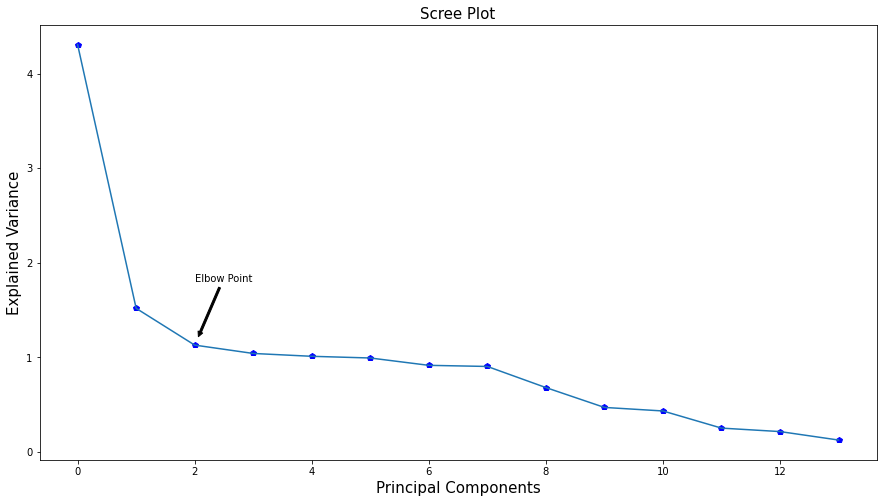

In [27]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# display the plot
plt.show()   

In [28]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[30.741020463620615,
 10.844579803757318,
 8.06967239616532,
 7.439326848377642,
 7.22408937306414,
 7.096682041376935,
 6.542401993000886,
 6.457942273252866,
 4.864914532276546,
 3.3664343937427477,
 3.0988272354901287,
 1.8052810567603148,
 1.5435412594464728,
 0.9052863296680872]

In [29]:
# consider the eigenvectors corresponding to the first five highest eigenvalues
# these eigenvectors are the 1st, 2nd, 9th, 10th and 11th columns of 'eig_vec' 
eigenvector = eig_vec[:,[0,1,8,9,10]]

# print the vectors
eigenvector

array([[ 3.04538423e-01,  4.33467401e-01, -3.57778059e-02,
        -5.34637444e-02, -1.74706496e-01],
       [-8.82696560e-03,  1.06285227e-01,  5.17585850e-01,
        -3.08134801e-01,  3.06870579e-01],
       [-1.19613397e-02, -9.31137661e-02, -5.19834783e-01,
        -4.58164003e-01,  1.57959385e-02],
       [ 7.88568842e-03,  1.42351598e-01,  1.39495189e-01,
        -5.55285540e-01, -1.88153141e-01],
       [ 3.58682890e-01,  2.33112557e-01, -6.36529016e-02,
         5.82288560e-02, -6.66363162e-02],
       [-1.26919971e-02,  1.34952748e-01, -5.28570097e-01,
         3.60495333e-01,  1.22125474e-01],
       [ 6.93976618e-02,  6.10804377e-01,  3.40814631e-02,
         5.02895800e-02,  4.63664775e-02],
       [-2.04835654e-02, -5.14656975e-02, -3.13414736e-01,
        -4.24058560e-01, -3.57735271e-01],
       [ 4.14632329e-01,  2.65210204e-01, -2.71999133e-02,
         1.41815955e-03, -7.80306663e-02],
       [-1.47517980e-02, -1.31453831e-01,  2.34271801e-01,
         2.52928103e-01

In [31]:
# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [33]:
# take the dot product of 'df_attr_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(df_std.dot(eigenvector), columns= ['PC1','PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,3.905466,-0.095954,-1.117870,2.186599,0.477868
1,-2.558738,-1.250848,0.352867,1.301638,0.035775
2,-0.654722,1.059780,0.935477,-1.738105,-1.478593
3,-1.676318,0.024093,0.285561,-1.466101,1.850465
4,-1.242807,-0.865700,1.424404,0.868779,1.083326


## PCA using Python Library 

In [34]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 5, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df_std)

In [35]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
PCA= pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows of the transformed data
PCA.head()

,PC1,PC2,PC3,PC4,PC5
0,3.905466,-0.095954,1.117870,-2.186599,-0.477868
1,-2.558738,-1.250848,-0.352867,-1.301638,-0.035775
2,-0.654722,1.059780,-0.935477,1.738105,1.478593
3,-1.676318,0.024093,-0.285561,1.466101,-1.850465
4,-1.242807,-0.865700,-1.424404,-0.868779,-1.083326
